In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Set rcParams for text size
plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'figure.figsize': [6, 4]
})

In [9]:
# Example data
data = [
    ('Unaware', 13.1, 38),
    ('Unaware\n+ timeout', 14.1, 38),
    ('Trace aware,\n instantaneous', 30.3, 300),
    ('Client-Notify', 30.2, 300),
]

In [10]:
def plot_acc_rounds_data(data, name, xlabel):
    # Extract data
    solutions, accuracies, rounds = zip(*data)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(6, 4))

    # Bar plot for accuracy
    bars = ax1.bar(solutions, accuracies, color='b', alpha=0.6, label='Accuracy')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Accuracy (%)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom',
                     color='blue',  # color of the text
                     fontsize=12)  # font size of the text

    # Line plot for number of rounds
    ax2 = ax1.twinx()
    line = ax2.plot(solutions, rounds, color='r', marker='o', label='Num Rounds')
    ax2.set_ylabel('Rounds completed', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Set limits (optional)
    max_accuracy = max(accuracies)
    max_rounds = max(rounds)

    # Find the nearest 10 greater than max(accuracies)
    ax1_ylim_upper = math.ceil(max_accuracy / 10.0) * 10

    # Find the nearest 100 greater than max(rounds)
    ax2_ylim_upper = math.ceil(max_rounds / 100.0) * 100
    
    ax1.set_ylim(0, ax1_ylim_upper)
    ax2.set_ylim(0, ax2_ylim_upper )
    
    # Save the figure as a PDF file
    plt.savefig(name+'.pdf', format='pdf', bbox_inches='tight')

    # Showing the plot
    plt.show()

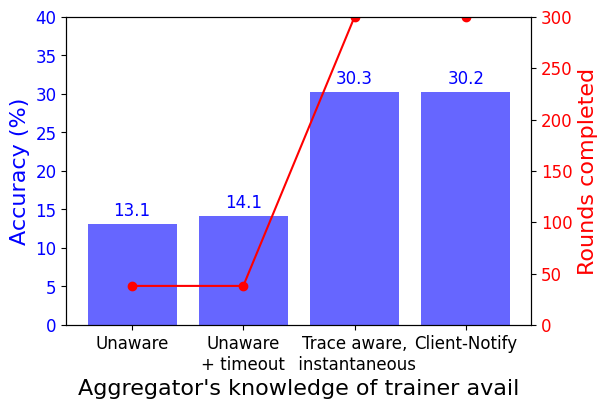

In [12]:
plot_acc_rounds_data(data, "acc_round_awareness_current_no_straggler", xlabel="Aggregator\'s knowledge of trainer avail")

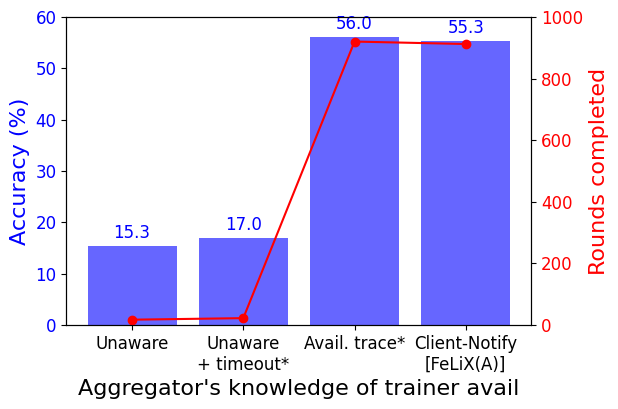

In [13]:
data = [
    ('Unaware', 15.3, 17),
    ('Unaware\n+ timeout*', 17, 22),
    ('Avail. trace*', 56, 920),
    ('Client-Notify\n[FeLiX(A)]', 55.3, 912),
]
plot_acc_rounds_data(data, "23jun_avail_awareness_expt_n100_c20_k10_a100_fedbuff", xlabel="Aggregator\'s knowledge of trainer avail")

### AsyncOORT vs Fedbuff analysis

In [1]:
# AsyncOORT
oort_updates_count = {'505f9fc483cf4df68a2409257b5fad7d3c58387': 187, '505f9fc483cf4df68a2409257b5fad7d3c58438': 203, '505f9fc483cf4df68a2409257b5fad7d3c58372': 111, '505f9fc483cf4df68a2409257b5fad7d3c58391': 79, '505f9fc483cf4df68a2409257b5fad7d3c58470': 199, '505f9fc483cf4df68a2409257b5fad7d3c58421': 4, '505f9fc483cf4df68a2409257b5fad7d3c58405': 112, '505f9fc483cf4df68a2409257b5fad7d3c58457': 55, '505f9fc483cf4df68a2409257b5fad7d3c58444': 139, '505f9fc483cf4df68a2409257b5fad7d3c58419': 144, '505f9fc483cf4df68a2409257b5fad7d3c58399': 231, '505f9fc483cf4df68a2409257b5fad7d3c58402': 23, '505f9fc483cf4df68a2409257b5fad7d3c58398': 56, '505f9fc483cf4df68a2409257b5fad7d3c58375': 58, '505f9fc483cf4df68a2409257b5fad7d3c58442': 161, '505f9fc483cf4df68a2409257b5fad7d3c58406': 107, '505f9fc483cf4df68a2409257b5fad7d3c58393': 32, '505f9fc483cf4df68a2409257b5fad7d3c58468': 175, '505f9fc483cf4df68a2409257b5fad7d3c58428': 17, '505f9fc483cf4df68a2409257b5fad7d3c58456': 197, '505f9fc483cf4df68a2409257b5fad7d3c58412': 41, '505f9fc483cf4df68a2409257b5fad7d3c58459': 123, '505f9fc483cf4df68a2409257b5fad7d3c58401': 56, '505f9fc483cf4df68a2409257b5fad7d3c58439': 38, '505f9fc483cf4df68a2409257b5fad7d3c58420': 151, '505f9fc483cf4df68a2409257b5fad7d3c58437': 29, '505f9fc483cf4df68a2409257b5fad7d3c58425': 35, '505f9fc483cf4df68a2409257b5fad7d3c58433': 39, '505f9fc483cf4df68a2409257b5fad7d3c58373': 185, '505f9fc483cf4df68a2409257b5fad7d3c58400': 108, '505f9fc483cf4df68a2409257b5fad7d3c58452': 260, '505f9fc483cf4df68a2409257b5fad7d3c58386': 149, '505f9fc483cf4df68a2409257b5fad7d3c58409': 34, '505f9fc483cf4df68a2409257b5fad7d3c58418': 116, '505f9fc483cf4df68a2409257b5fad7d3c58416': 22, '505f9fc483cf4df68a2409257b5fad7d3c58451': 122, '505f9fc483cf4df68a2409257b5fad7d3c58410': 37, '505f9fc483cf4df68a2409257b5fad7d3c58411': 229, '505f9fc483cf4df68a2409257b5fad7d3c58417': 18, '505f9fc483cf4df68a2409257b5fad7d3c58449': 207, '505f9fc483cf4df68a2409257b5fad7d3c58383': 22, '505f9fc483cf4df68a2409257b5fad7d3c58432': 340, '505f9fc483cf4df68a2409257b5fad7d3c58429': 218, '505f9fc483cf4df68a2409257b5fad7d3c58384': 88, '505f9fc483cf4df68a2409257b5fad7d3c58427': 121, '505f9fc483cf4df68a2409257b5fad7d3c58385': 48, '505f9fc483cf4df68a2409257b5fad7d3c58407': 27, '505f9fc483cf4df68a2409257b5fad7d3c58446': 9, '505f9fc483cf4df68a2409257b5fad7d3c58455': 73, '505f9fc483cf4df68a2409257b5fad7d3c58413': 24, '505f9fc483cf4df68a2409257b5fad7d3c58395': 25, '505f9fc483cf4df68a2409257b5fad7d3c58389': 52, '505f9fc483cf4df68a2409257b5fad7d3c58414': 49, '505f9fc483cf4df68a2409257b5fad7d3c58453': 101, '505f9fc483cf4df68a2409257b5fad7d3c58434': 115, '505f9fc483cf4df68a2409257b5fad7d3c58392': 82, '505f9fc483cf4df68a2409257b5fad7d3c58423': 49, '505f9fc483cf4df68a2409257b5fad7d3c58371': 160, '505f9fc483cf4df68a2409257b5fad7d3c58467': 124, '505f9fc483cf4df68a2409257b5fad7d3c58374': 295, '505f9fc483cf4df68a2409257b5fad7d3c58422': 197, '505f9fc483cf4df68a2409257b5fad7d3c58436': 71, '505f9fc483cf4df68a2409257b5fad7d3c58460': 52, '505f9fc483cf4df68a2409257b5fad7d3c58376': 37, '505f9fc483cf4df68a2409257b5fad7d3c58404': 163, '505f9fc483cf4df68a2409257b5fad7d3c58388': 63, '505f9fc483cf4df68a2409257b5fad7d3c58380': 82, '505f9fc483cf4df68a2409257b5fad7d3c58466': 114, '505f9fc483cf4df68a2409257b5fad7d3c58408': 18, '505f9fc483cf4df68a2409257b5fad7d3c58403': 256, '505f9fc483cf4df68a2409257b5fad7d3c58463': 115, '505f9fc483cf4df68a2409257b5fad7d3c58465': 50, '505f9fc483cf4df68a2409257b5fad7d3c58440': 102, '505f9fc483cf4df68a2409257b5fad7d3c58462': 66, '505f9fc483cf4df68a2409257b5fad7d3c58379': 51, '505f9fc483cf4df68a2409257b5fad7d3c58415': 14, '505f9fc483cf4df68a2409257b5fad7d3c58448': 16, '505f9fc483cf4df68a2409257b5fad7d3c58382': 69, '505f9fc483cf4df68a2409257b5fad7d3c58458': 95, '505f9fc483cf4df68a2409257b5fad7d3c58445': 37, '505f9fc483cf4df68a2409257b5fad7d3c58450': 42, '505f9fc483cf4df68a2409257b5fad7d3c58469': 38, '505f9fc483cf4df68a2409257b5fad7d3c58435': 12, '505f9fc483cf4df68a2409257b5fad7d3c58394': 115, '505f9fc483cf4df68a2409257b5fad7d3c58454': 2, '505f9fc483cf4df68a2409257b5fad7d3c58424': 19, '505f9fc483cf4df68a2409257b5fad7d3c58431': 26, '505f9fc483cf4df68a2409257b5fad7d3c58447': 122, '505f9fc483cf4df68a2409257b5fad7d3c58443': 72, '505f9fc483cf4df68a2409257b5fad7d3c58430': 19, '505f9fc483cf4df68a2409257b5fad7d3c58378': 165, '505f9fc483cf4df68a2409257b5fad7d3c58426': 183, '505f9fc483cf4df68a2409257b5fad7d3c58464': 30, '505f9fc483cf4df68a2409257b5fad7d3c58381': 14, '505f9fc483cf4df68a2409257b5fad7d3c58461': 18, '505f9fc483cf4df68a2409257b5fad7d3c58441': 126, '505f9fc483cf4df68a2409257b5fad7d3c58396': 46, '505f9fc483cf4df68a2409257b5fad7d3c58397': 17, '505f9fc483cf4df68a2409257b5fad7d3c58377': 14, '505f9fc483cf4df68a2409257b5fad7d3c58390': 1}

In [2]:
# Fedbuff
fedbuff_updates_count = {'505f9fc483cf4df68a2409257b5fad7d3c58406': 105, '505f9fc483cf4df68a2409257b5fad7d3c58372': 108, '505f9fc483cf4df68a2409257b5fad7d3c58438': 215, '505f9fc483cf4df68a2409257b5fad7d3c58399': 257, '505f9fc483cf4df68a2409257b5fad7d3c58405': 112, '505f9fc483cf4df68a2409257b5fad7d3c58419': 153, '505f9fc483cf4df68a2409257b5fad7d3c58412': 50, '505f9fc483cf4df68a2409257b5fad7d3c58411': 233, '505f9fc483cf4df68a2409257b5fad7d3c58451': 133, '505f9fc483cf4df68a2409257b5fad7d3c58375': 61, '505f9fc483cf4df68a2409257b5fad7d3c58374': 249, '505f9fc483cf4df68a2409257b5fad7d3c58441': 127, '505f9fc483cf4df68a2409257b5fad7d3c58387': 206, '505f9fc483cf4df68a2409257b5fad7d3c58418': 109, '505f9fc483cf4df68a2409257b5fad7d3c58429': 220, '505f9fc483cf4df68a2409257b5fad7d3c58391': 80, '505f9fc483cf4df68a2409257b5fad7d3c58407': 26, '505f9fc483cf4df68a2409257b5fad7d3c58468': 177, '505f9fc483cf4df68a2409257b5fad7d3c58383': 22, '505f9fc483cf4df68a2409257b5fad7d3c58421': 3, '505f9fc483cf4df68a2409257b5fad7d3c58459': 118, '505f9fc483cf4df68a2409257b5fad7d3c58401': 59, '505f9fc483cf4df68a2409257b5fad7d3c58425': 37, '505f9fc483cf4df68a2409257b5fad7d3c58444': 137, '505f9fc483cf4df68a2409257b5fad7d3c58410': 35, '505f9fc483cf4df68a2409257b5fad7d3c58400': 112, '505f9fc483cf4df68a2409257b5fad7d3c58393': 32, '505f9fc483cf4df68a2409257b5fad7d3c58417': 16, '505f9fc483cf4df68a2409257b5fad7d3c58456': 195, '505f9fc483cf4df68a2409257b5fad7d3c58373': 182, '505f9fc483cf4df68a2409257b5fad7d3c58457': 49, '505f9fc483cf4df68a2409257b5fad7d3c58439': 37, '505f9fc483cf4df68a2409257b5fad7d3c58442': 153, '505f9fc483cf4df68a2409257b5fad7d3c58386': 147, '505f9fc483cf4df68a2409257b5fad7d3c58432': 346, '505f9fc483cf4df68a2409257b5fad7d3c58390': 1, '505f9fc483cf4df68a2409257b5fad7d3c58437': 27, '505f9fc483cf4df68a2409257b5fad7d3c58446': 10, '505f9fc483cf4df68a2409257b5fad7d3c58470': 197, '505f9fc483cf4df68a2409257b5fad7d3c58385': 45, '505f9fc483cf4df68a2409257b5fad7d3c58427': 124, '505f9fc483cf4df68a2409257b5fad7d3c58428': 16, '505f9fc483cf4df68a2409257b5fad7d3c58389': 55, '505f9fc483cf4df68a2409257b5fad7d3c58449': 226, '505f9fc483cf4df68a2409257b5fad7d3c58433': 35, '505f9fc483cf4df68a2409257b5fad7d3c58384': 86, '505f9fc483cf4df68a2409257b5fad7d3c58413': 22, '505f9fc483cf4df68a2409257b5fad7d3c58395': 24, '505f9fc483cf4df68a2409257b5fad7d3c58409': 32, '505f9fc483cf4df68a2409257b5fad7d3c58420': 144, '505f9fc483cf4df68a2409257b5fad7d3c58416': 21, '505f9fc483cf4df68a2409257b5fad7d3c58453': 92, '505f9fc483cf4df68a2409257b5fad7d3c58434': 118, '505f9fc483cf4df68a2409257b5fad7d3c58392': 85, '505f9fc483cf4df68a2409257b5fad7d3c58423': 50, '505f9fc483cf4df68a2409257b5fad7d3c58371': 164, '505f9fc483cf4df68a2409257b5fad7d3c58455': 80, '505f9fc483cf4df68a2409257b5fad7d3c58467': 124, '505f9fc483cf4df68a2409257b5fad7d3c58422': 189, '505f9fc483cf4df68a2409257b5fad7d3c58436': 70, '505f9fc483cf4df68a2409257b5fad7d3c58452': 266, '505f9fc483cf4df68a2409257b5fad7d3c58460': 52, '505f9fc483cf4df68a2409257b5fad7d3c58376': 36, '505f9fc483cf4df68a2409257b5fad7d3c58404': 161, '505f9fc483cf4df68a2409257b5fad7d3c58388': 57, '505f9fc483cf4df68a2409257b5fad7d3c58398': 54, '505f9fc483cf4df68a2409257b5fad7d3c58435': 12, '505f9fc483cf4df68a2409257b5fad7d3c58380': 87, '505f9fc483cf4df68a2409257b5fad7d3c58466': 109, '505f9fc483cf4df68a2409257b5fad7d3c58408': 17, '505f9fc483cf4df68a2409257b5fad7d3c58403': 280, '505f9fc483cf4df68a2409257b5fad7d3c58463': 122, '505f9fc483cf4df68a2409257b5fad7d3c58465': 49, '505f9fc483cf4df68a2409257b5fad7d3c58440': 109, '505f9fc483cf4df68a2409257b5fad7d3c58462': 65, '505f9fc483cf4df68a2409257b5fad7d3c58379': 50, '505f9fc483cf4df68a2409257b5fad7d3c58415': 11, '505f9fc483cf4df68a2409257b5fad7d3c58448': 16, '505f9fc483cf4df68a2409257b5fad7d3c58382': 80, '505f9fc483cf4df68a2409257b5fad7d3c58458': 116, '505f9fc483cf4df68a2409257b5fad7d3c58445': 37, '505f9fc483cf4df68a2409257b5fad7d3c58450': 40, '505f9fc483cf4df68a2409257b5fad7d3c58469': 36, '505f9fc483cf4df68a2409257b5fad7d3c58414': 44, '505f9fc483cf4df68a2409257b5fad7d3c58394': 116, '505f9fc483cf4df68a2409257b5fad7d3c58454': 21, '505f9fc483cf4df68a2409257b5fad7d3c58424': 18, '505f9fc483cf4df68a2409257b5fad7d3c58431': 24, '505f9fc483cf4df68a2409257b5fad7d3c58447': 104, '505f9fc483cf4df68a2409257b5fad7d3c58443': 57, '505f9fc483cf4df68a2409257b5fad7d3c58430': 17, '505f9fc483cf4df68a2409257b5fad7d3c58378': 182, '505f9fc483cf4df68a2409257b5fad7d3c58426': 179, '505f9fc483cf4df68a2409257b5fad7d3c58464': 28, '505f9fc483cf4df68a2409257b5fad7d3c58381': 13, '505f9fc483cf4df68a2409257b5fad7d3c58461': 17, '505f9fc483cf4df68a2409257b5fad7d3c58396': 46, '505f9fc483cf4df68a2409257b5fad7d3c58397': 19, '505f9fc483cf4df68a2409257b5fad7d3c58402': 22, '505f9fc483cf4df68a2409257b5fad7d3c58377': 13}

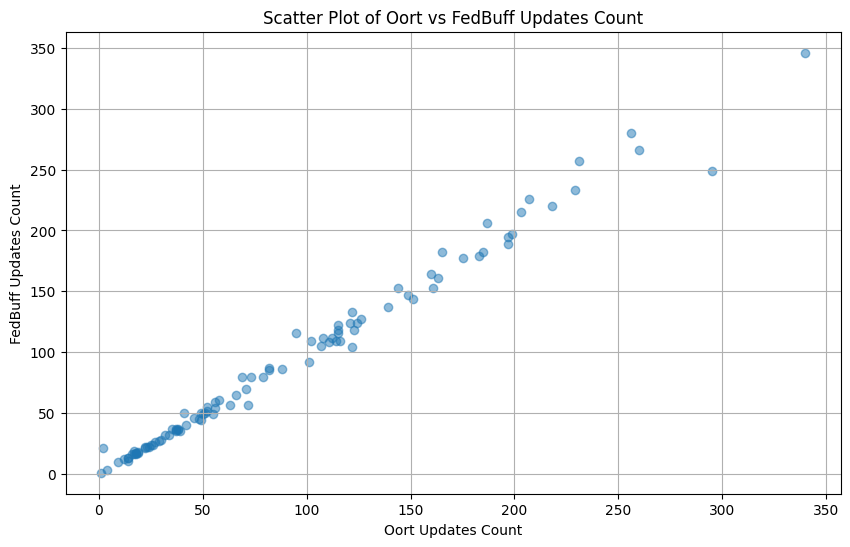

In [5]:
# Extract values ensuring the keys match
common_keys = oort_updates_count.keys()
oort_values = [oort_updates_count[key] for key in common_keys]
fedbuff_values = [fedbuff_updates_count[key] for key in common_keys]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(oort_values, fedbuff_values, alpha=0.5)
plt.xlabel('Oort Updates Count')
plt.ylabel('FedBuff Updates Count')
plt.title('Scatter Plot of Oort vs FedBuff Updates Count')
plt.grid(True)
plt.show()


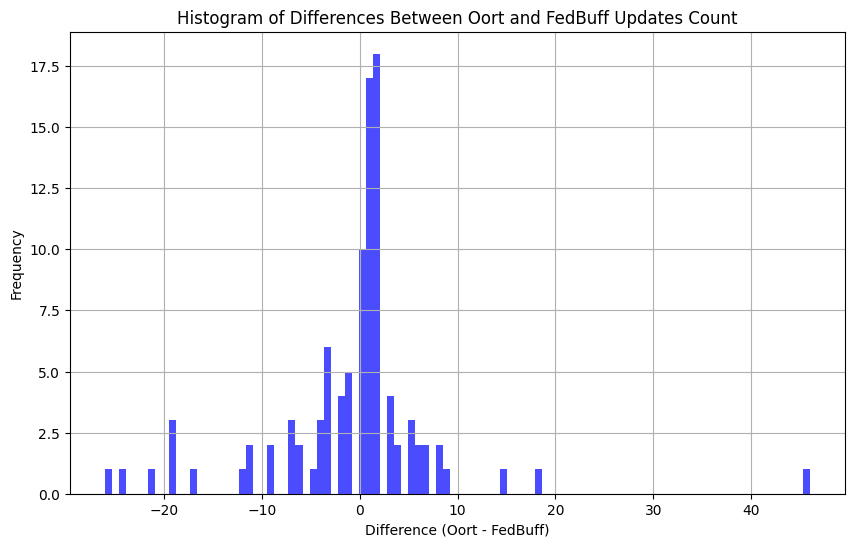

In [6]:
import numpy as np

# Calculate differences ensuring the keys match
differences = [oort_updates_count[key] - fedbuff_updates_count[key] for key in common_keys]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=100, alpha=0.7, color='blue')
plt.xlabel('Difference (Oort - FedBuff)')
plt.ylabel('Frequency')
plt.title('Histogram of Differences Between Oort and FedBuff Updates Count')
plt.grid(True)
plt.show()

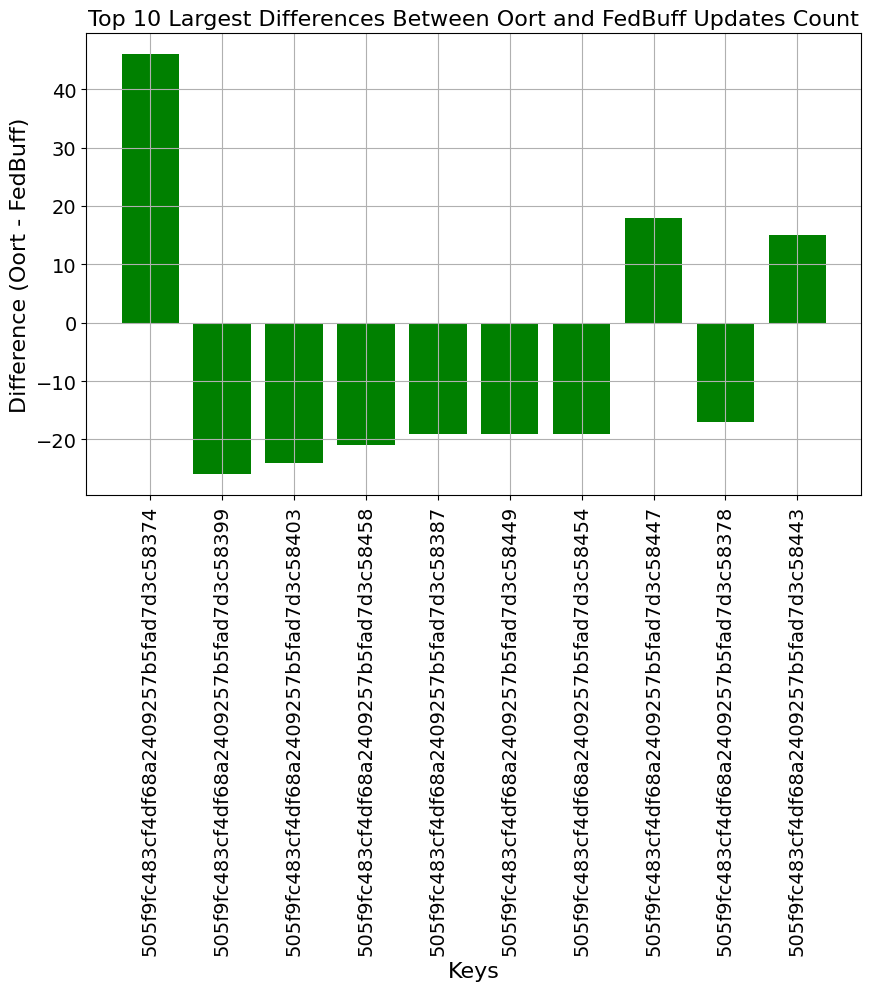

In [11]:
# Calculate differences ensuring the keys match and sort by absolute difference
sorted_keys = sorted(common_keys, key=lambda k: abs(oort_updates_count[k] - fedbuff_updates_count[k]), reverse=True)

# Select top 10 keys
top_keys = sorted_keys[:10]
top_differences = [oort_updates_count[key] - fedbuff_updates_count[key] for key in top_keys]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_keys, top_differences, color='green')
plt.xlabel('Keys')
plt.ylabel('Difference (Oort - FedBuff)')
plt.title('Top 10 Largest Differences Between Oort and FedBuff Updates Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [12]:
#### PER round analysis
import re
from collections import defaultdict
import matplotlib.pyplot as plt

def parse_log_file(log_file_path):
    round_trainers = defaultdict(list)
    round_number = 0
    trainer_pattern = re.compile(r"received model updates from (\w+) with model")
    round_pattern = re.compile(r"====== aggregation finished for round (\d+)")
    
    with open(log_file_path, 'r') as log_file:
        for line in log_file:
            trainer_match = trainer_pattern.search(line)
            if trainer_match:
                trainer_id = trainer_match.group(1)
                round_trainers[round_number].append(trainer_id)
            
            round_match = round_pattern.search(line)
            if round_match:
                round_number = int(round_match.group(1))
    
    return round_trainers

def calculate_trainer_differences(async_oort_trainers, fedbuff_trainers):
    round_differences = {}
    for round_number in async_oort_trainers:
        async_oort_set = set(async_oort_trainers[round_number])
        fedbuff_set = set(fedbuff_trainers.get(round_number, []))
        difference = async_oort_set.symmetric_difference(fedbuff_set)
        round_differences[round_number] = len(difference)
    return round_differences

def visualize_trainer_differences(trainer_differences):
    # Extract round numbers and differences
    rounds = list(trainer_differences.keys())
    differences = list(trainer_differences.values())

    # Bar plot
    plt.figure(figsize=(15, 8))
    plt.bar(rounds, differences, color='blue')
    plt.xlabel('Round Number')
    plt.ylabel('Number of Differing Trainers')
    plt.title('Number of Differing Trainers per Round between Async Oort and Fedbuff')
    plt.grid(True)
    plt.show()

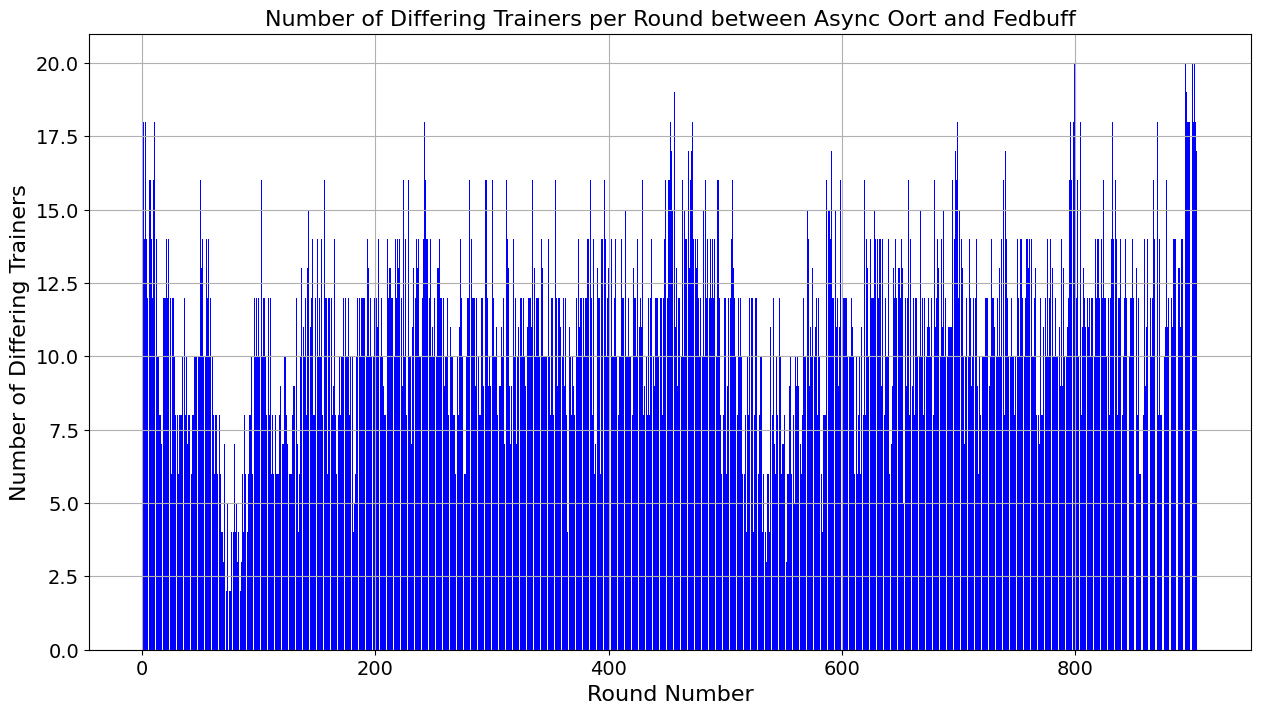

In [14]:
# Example usage:
dir_relative_location = '../lib/python/examples/async_cifar10/aggregator/'
async_oort_trainers = parse_log_file(dir_relative_location + 'agg_22jun_n100_c20_asyncoort_client_avail_90m_straggler_1m_timeout_1Krounds.log')
fedbuff_trainers = parse_log_file(dir_relative_location + 'agg_22jun_n100_c20_client_avail_90m_straggler_1m_timeout_1Krounds.log')
trainer_differences = calculate_trainer_differences(async_oort_trainers, fedbuff_trainers)
visualize_trainer_differences(trainer_differences)

In [15]:
async_oort_trainers

defaultdict(list,
            {0: ['505f9fc483cf4df68a2409257b5fad7d3c58387',
              '505f9fc483cf4df68a2409257b5fad7d3c58438',
              '505f9fc483cf4df68a2409257b5fad7d3c58372',
              '505f9fc483cf4df68a2409257b5fad7d3c58391',
              '505f9fc483cf4df68a2409257b5fad7d3c58470',
              '505f9fc483cf4df68a2409257b5fad7d3c58421',
              '505f9fc483cf4df68a2409257b5fad7d3c58405',
              '505f9fc483cf4df68a2409257b5fad7d3c58457',
              '505f9fc483cf4df68a2409257b5fad7d3c58444',
              '505f9fc483cf4df68a2409257b5fad7d3c58419'],
             1: ['505f9fc483cf4df68a2409257b5fad7d3c58399',
              '505f9fc483cf4df68a2409257b5fad7d3c58402',
              '505f9fc483cf4df68a2409257b5fad7d3c58398',
              '505f9fc483cf4df68a2409257b5fad7d3c58375',
              '505f9fc483cf4df68a2409257b5fad7d3c58442',
              '505f9fc483cf4df68a2409257b5fad7d3c58406',
              '505f9fc483cf4df68a2409257b5fad7d3c58393',
      

In [16]:
fedbuff_trainers

defaultdict(list,
            {0: ['505f9fc483cf4df68a2409257b5fad7d3c58406',
              '505f9fc483cf4df68a2409257b5fad7d3c58372',
              '505f9fc483cf4df68a2409257b5fad7d3c58438',
              '505f9fc483cf4df68a2409257b5fad7d3c58399',
              '505f9fc483cf4df68a2409257b5fad7d3c58405',
              '505f9fc483cf4df68a2409257b5fad7d3c58419',
              '505f9fc483cf4df68a2409257b5fad7d3c58412',
              '505f9fc483cf4df68a2409257b5fad7d3c58411',
              '505f9fc483cf4df68a2409257b5fad7d3c58451',
              '505f9fc483cf4df68a2409257b5fad7d3c58375'],
             1: ['505f9fc483cf4df68a2409257b5fad7d3c58374',
              '505f9fc483cf4df68a2409257b5fad7d3c58441',
              '505f9fc483cf4df68a2409257b5fad7d3c58387',
              '505f9fc483cf4df68a2409257b5fad7d3c58418',
              '505f9fc483cf4df68a2409257b5fad7d3c58429',
              '505f9fc483cf4df68a2409257b5fad7d3c58391',
              '505f9fc483cf4df68a2409257b5fad7d3c58407',
      

In [17]:
trainer_differences

{0: 12,
 1: 18,
 2: 14,
 3: 18,
 4: 14,
 5: 12,
 6: 16,
 7: 16,
 8: 14,
 9: 12,
 10: 16,
 11: 18,
 12: 14,
 13: 10,
 14: 10,
 15: 8,
 16: 8,
 17: 7,
 18: 12,
 19: 12,
 20: 12,
 21: 14,
 22: 12,
 23: 14,
 24: 12,
 25: 6,
 26: 12,
 27: 12,
 28: 10,
 29: 8,
 30: 8,
 31: 6,
 32: 8,
 33: 8,
 34: 8,
 35: 10,
 36: 12,
 37: 8,
 38: 10,
 39: 7,
 40: 8,
 41: 8,
 42: 6,
 43: 8,
 44: 8,
 45: 10,
 46: 10,
 47: 10,
 48: 10,
 49: 10,
 50: 16,
 51: 13,
 52: 14,
 53: 10,
 54: 10,
 55: 14,
 56: 12,
 57: 14,
 58: 10,
 59: 12,
 60: 10,
 61: 8,
 62: 6,
 63: 8,
 64: 8,
 65: 6,
 66: 8,
 67: 6,
 68: 4,
 69: 4,
 70: 3,
 71: 7,
 72: 2,
 73: 5,
 74: 0,
 75: 2,
 76: 2,
 77: 4,
 78: 4,
 79: 7,
 80: 4,
 81: 5,
 82: 3,
 83: 4,
 84: 2,
 85: 3,
 86: 6,
 87: 4,
 88: 8,
 89: 6,
 90: 4,
 91: 6,
 92: 8,
 93: 8,
 94: 10,
 95: 6,
 96: 12,
 97: 10,
 98: 12,
 99: 10,
 100: 12,
 101: 10,
 102: 16,
 103: 10,
 104: 12,
 105: 12,
 106: 10,
 107: 8,
 108: 12,
 109: 8,
 110: 12,
 111: 6,
 112: 8,
 113: 6,
 114: 8,
 115: 6,
 116: 6,

In [18]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt

def parse_log_file(log_file_path):
    round_trainers = defaultdict(list)
    round_number = 0
    trainer_pattern = re.compile(r"received model updates from (\w+) with model")
    round_pattern = re.compile(r"====== aggregation finished for round (\d+)")
    
    with open(log_file_path, 'r') as log_file:
        for line in log_file:
            trainer_match = trainer_pattern.search(line)
            if trainer_match:
                trainer_id = trainer_match.group(1)
                round_trainers[round_number].append(trainer_id)
            
            round_match = round_pattern.search(line)
            if round_match:
                round_number = int(round_match.group(1))
    
    return round_trainers

def calculate_trainer_intersections(async_oort_trainers, fedbuff_trainers):
    round_intersections = {}
    for round_number in async_oort_trainers:
        async_oort_set = set(async_oort_trainers[round_number])
        fedbuff_set = set(fedbuff_trainers.get(round_number, [])) # use an empty set if the round number doesn't exist in fedbuff
        intersection = async_oort_set.intersection(fedbuff_set)
        round_intersections[round_number] = len(intersection) # count of common trainers in both sets
    return round_intersections

def visualize_trainer_intersections(trainer_intersections):
    # Extract round numbers and intersections
    rounds = list(trainer_intersections.keys())
    intersections = list(trainer_intersections.values())

    # Bar plot
    plt.figure(figsize=(15, 8))
    plt.bar(rounds, intersections, color='green')
    plt.xlabel('Round Number')
    plt.ylabel('Number of Common Trainers')
    plt.title('Number of Common Trainers per Round between Async Oort and Fedbuff')
    plt.grid(True)
    plt.show()

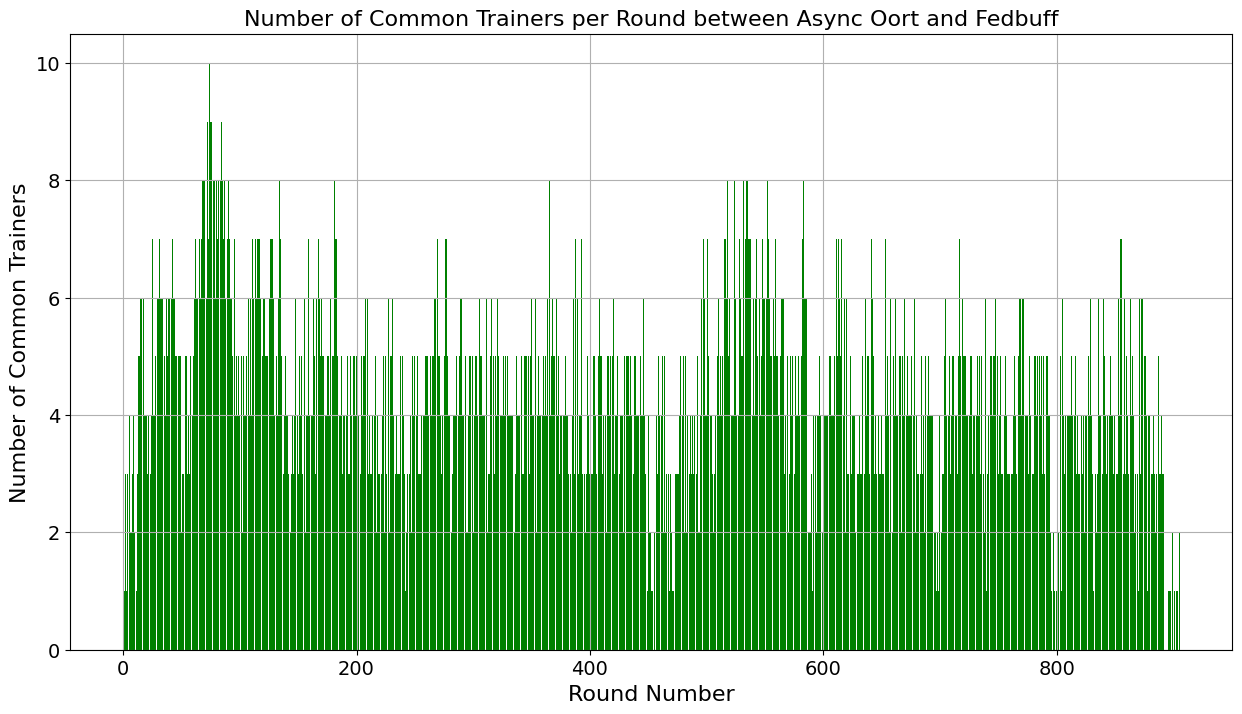

In [19]:
# Example usage:
dir_relative_location = '../lib/python/examples/async_cifar10/aggregator/'
async_oort_trainers = parse_log_file(dir_relative_location + 'agg_22jun_n100_c20_asyncoort_client_avail_90m_straggler_1m_timeout_1Krounds.log')
fedbuff_trainers = parse_log_file(dir_relative_location + 'agg_22jun_n100_c20_client_avail_90m_straggler_1m_timeout_1Krounds.log')
trainer_intersections = calculate_trainer_intersections(async_oort_trainers, fedbuff_trainers)
visualize_trainer_intersections(trainer_intersections)

In [16]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

def parse_log_file(log_file_path, max_round):
    round_trainers = defaultdict(list)
    round_number = 0
    trainer_pattern = re.compile(r"received model updates from (\w+) with model")
    round_pattern = re.compile(r"====== aggregation finished for round (\d+)")
    
    with open(log_file_path, 'r') as log_file:
        for line in log_file:
            if round_number > max_round:
                break
            
            trainer_match = trainer_pattern.search(line)
            if trainer_match:
                trainer_id = trainer_match.group(1)
                round_trainers[round_number].append(trainer_id)
            
            round_match = round_pattern.search(line)
            if round_match:
                round_number = int(round_match.group(1))
    
    return round_trainers

def calculate_trainer_intersections(async_oort_trainers, fedbuff_trainers):
    round_intersections = {}
    for round_number in async_oort_trainers:
        async_oort_set = set(async_oort_trainers[round_number])
        fedbuff_set = set(fedbuff_trainers.get(round_number, [])) # use an empty set if the round number doesn't exist in fedbuff
        intersection = async_oort_set.intersection(fedbuff_set)
        round_intersections[round_number] = len(intersection) # count of common trainers in both sets
    return round_intersections

def visualize_trainer_intersections(trainer_intersections):
    # Extract round numbers and intersections
    rounds = list(trainer_intersections.keys())
    intersections = list(trainer_intersections.values())
    
    # Bar plot without percentages
    plt.figure(figsize=(15, 8))
    plt.bar(rounds, intersections, color='green')
    plt.xlabel('Round Number')
    plt.ylabel('Number of Common Trainers')
    plt.title('Number of Common Trainers per Round between Async Oort and Fedbuff')
    plt.grid(True)
    plt.show()

    # Histogram of intersections
    plt.figure(figsize=(15, 8))
    n, bins, patches = plt.hist(intersections, bins=20, color='blue', alpha=0.7)
    plt.xlabel('Number of Common Trainers')
    plt.ylabel('Frequency')
    plt.title('Histogram of Number of Common Trainers per Round')
    plt.grid(True)
    
    # Add percentage labels above each bar in the histogram
    total_counts = sum(n)
    for count, bin_edge in zip(n, bins):
        if count > 0:  # Only add text for non-zero counts
            percentage = (count / total_counts) * 100
            plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

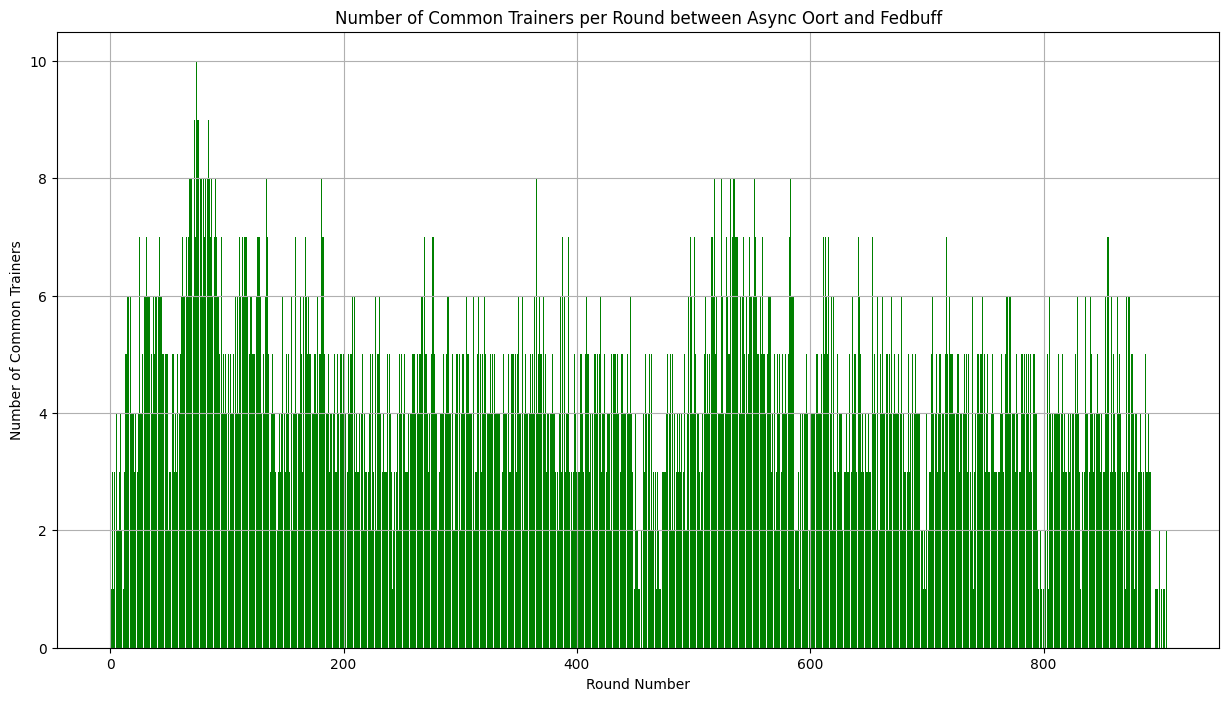

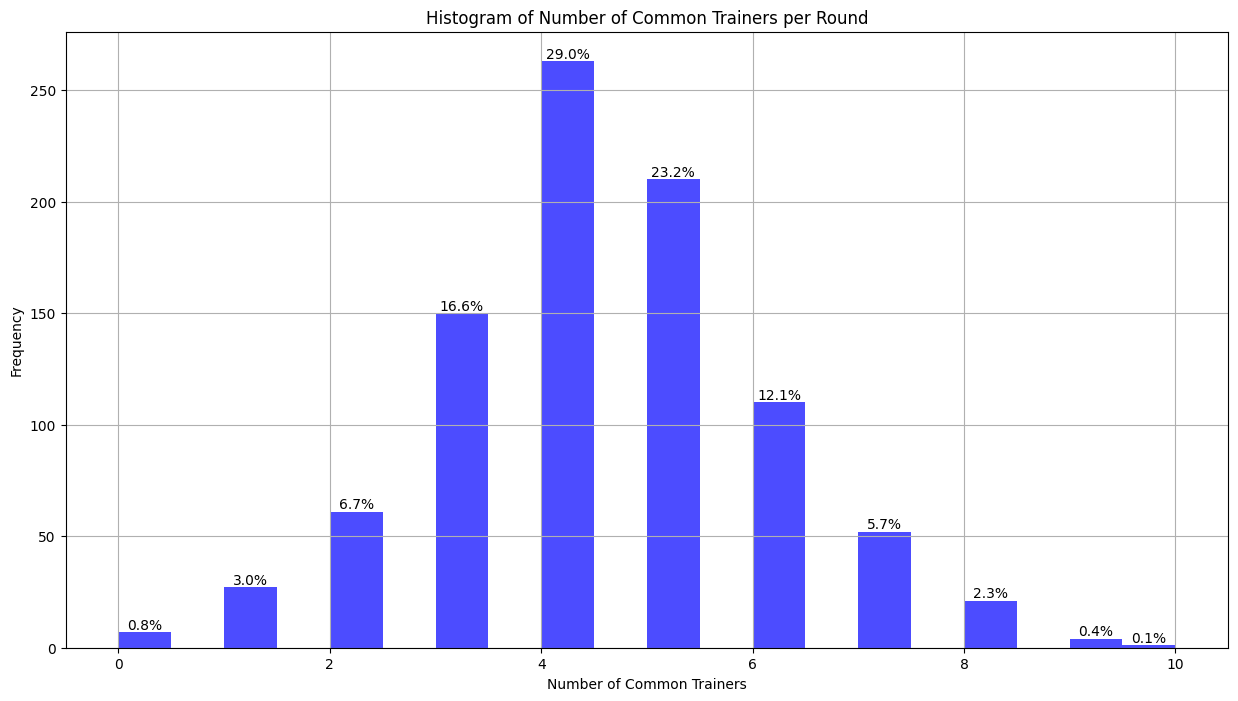

In [2]:
# Example usage:
max_round = 906  # Specify the maximum round number to parse
dir_relative_location = '../lib/python/examples/async_cifar10/aggregator/'
async_oort_trainers = parse_log_file(dir_relative_location + 'agg_22jun_n100_c20_asyncoort_client_avail_90m_straggler_1m_timeout_1Krounds.log', max_round)
fedbuff_trainers = parse_log_file(dir_relative_location + 'agg_22jun_n100_c20_client_avail_90m_straggler_1m_timeout_1Krounds.log', max_round)
trainer_intersections = calculate_trainer_intersections(async_oort_trainers, fedbuff_trainers)
visualize_trainer_intersections(trainer_intersections)

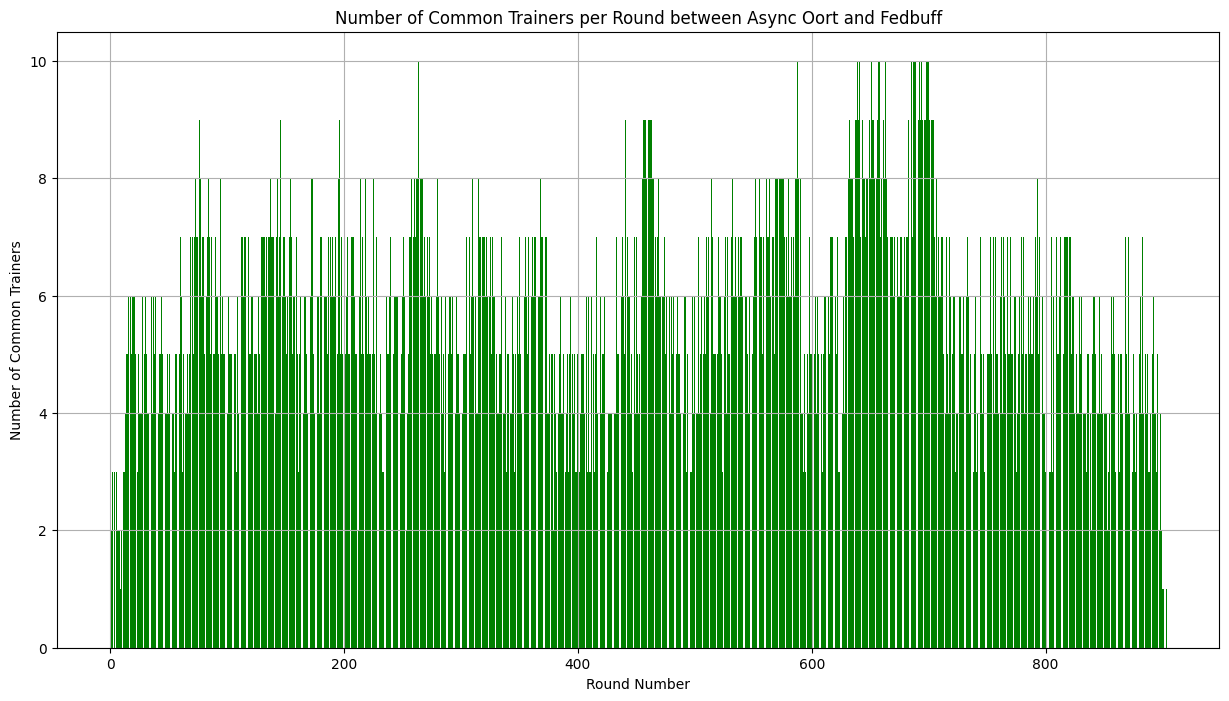

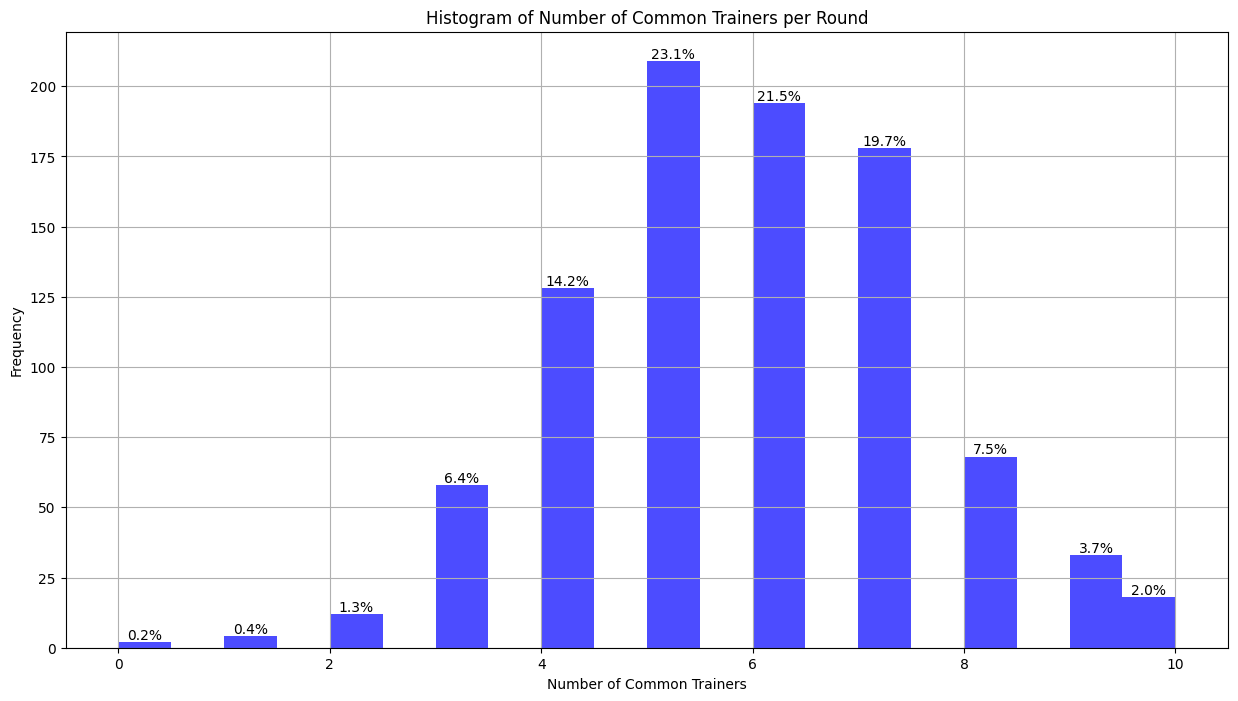

In [3]:
# TODO: Re-run fedbuff to see if you get a better match with itself in
# re-run. Will tell you if there is an actual sampling difference or
# is it just by chance this happened.
max_round = 903  # Specify the maximum round number to parse
dir_relative_location = '../lib/python/examples/async_cifar10/aggregator/'
async_oort_trainers = parse_log_file(dir_relative_location + 'agg_23jun_n100_c20_client_avail_90m_straggler_1m_timeout_1Krounds.log', max_round)
fedbuff_trainers = parse_log_file(dir_relative_location + 'agg_22jun_n100_c20_client_avail_90m_straggler_1m_timeout_1Krounds.log', max_round)
trainer_intersections = calculate_trainer_intersections(async_oort_trainers, fedbuff_trainers)
visualize_trainer_intersections(trainer_intersections)

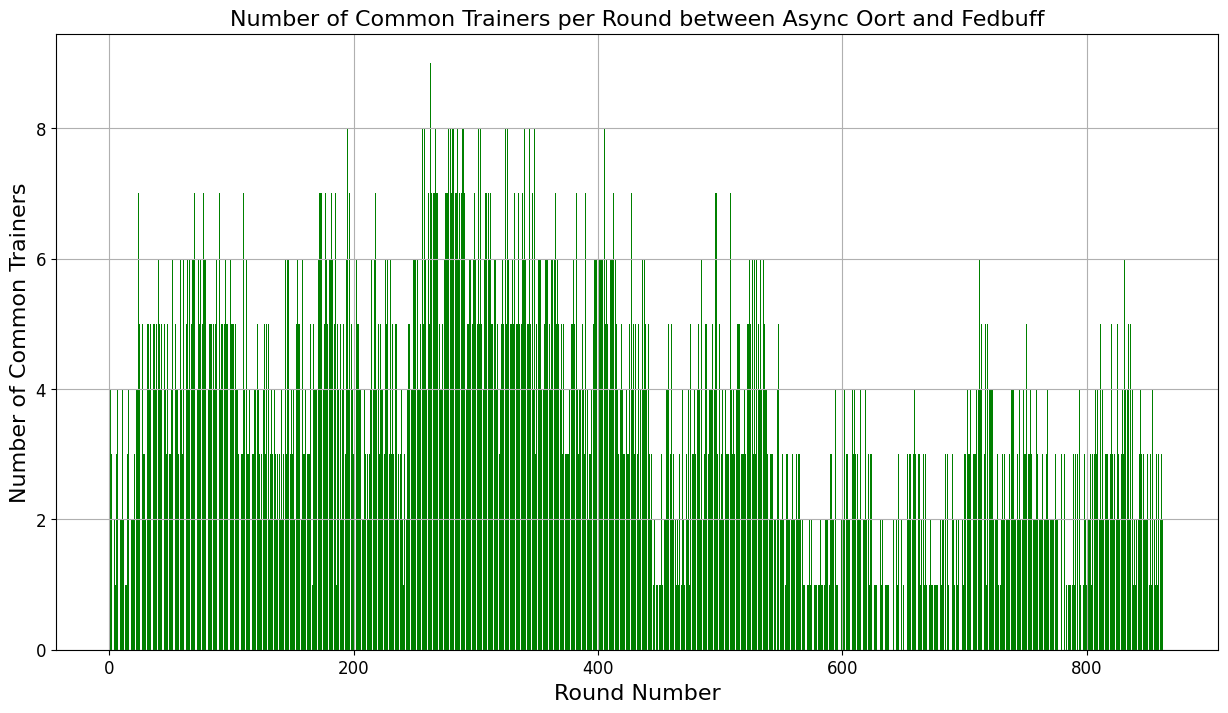

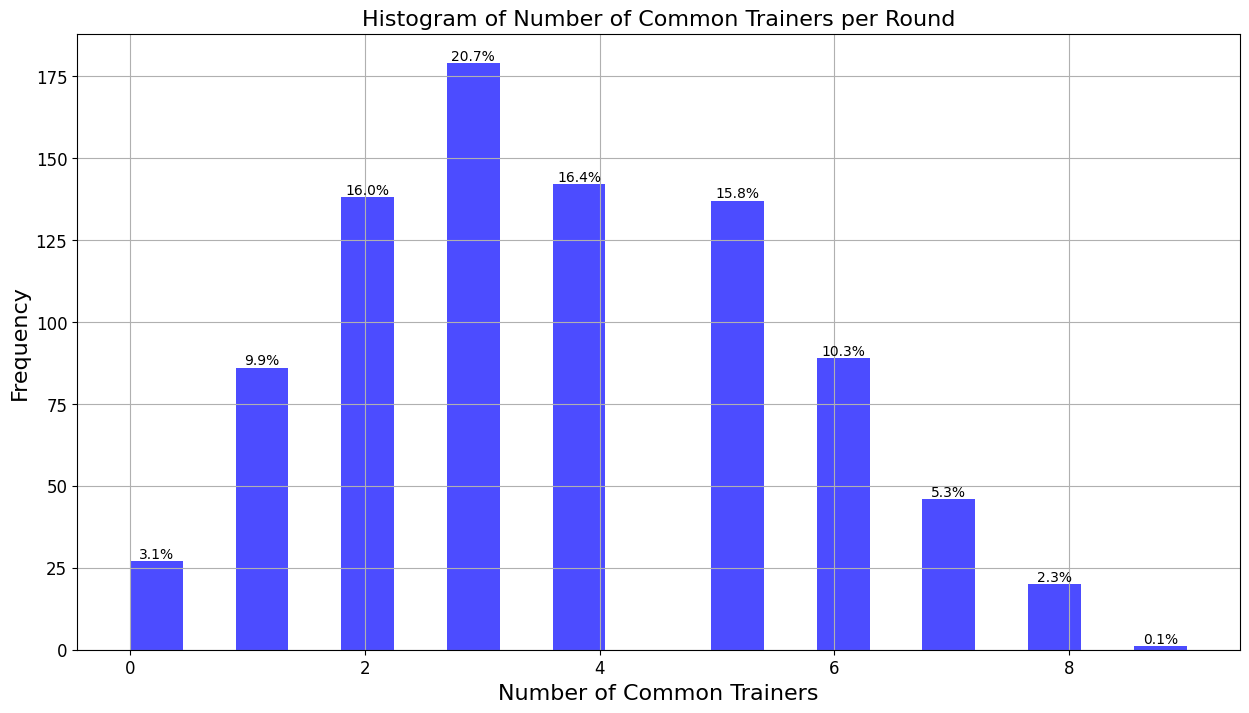

In [17]:
# Example usage:
max_round = 864  # Specify the maximum round number to parse
dir_relative_location = '../lib/python/examples/async_cifar10/aggregator/'
async_oort_trainers = parse_log_file(dir_relative_location + 'agg_23jun_n100_c20_asyncoort_alpha0.1_client_avail_90m_straggler_1m_timeout_1Krounds.log', max_round)
fedbuff_trainers = parse_log_file(dir_relative_location + 'agg_23jun_n100_c20_alpha0.1_client_avail_90m_straggler_1m_timeout_1Krounds.log', max_round)
trainer_intersections = calculate_trainer_intersections(async_oort_trainers, fedbuff_trainers)
visualize_trainer_intersections(trainer_intersections)

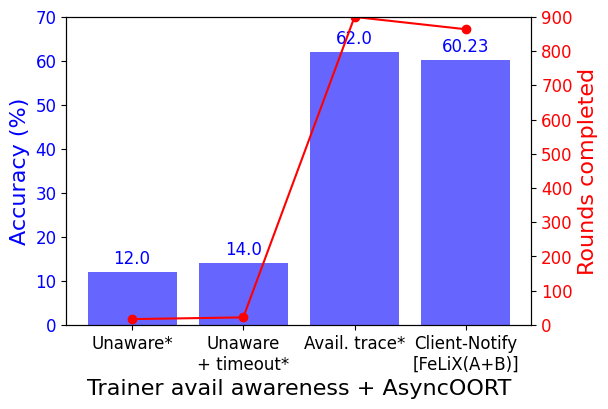

In [19]:
data = [
    ('Unaware*', 12, 17),
    ('Unaware\n+ timeout*', 14, 22),
    ('Avail. trace*', 62, 900),
    ('Client-Notify\n[FeLiX(A+B)]', 60.23, 864),
]
plot_acc_rounds_data(data, "23jun_avail_awareness_expt_n100_c20_k10_a0.1_asyncoort_fedbuff", xlabel="Trainer avail awareness + AsyncOORT")

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracies(x_labels, accuracies_alpha_0_1, accuracies_alpha_100, x_axis_label, file_name):
    fig, ax = plt.subplots()

    # Number of groups
    n_groups = len(x_labels)
    
    # Create array for group indices
    index = np.arange(n_groups)

    # Bar width
    bar_width = 0.35

    # Colors for gradient
    color_alpha_0_1 = '#6495ED'  # Cornflower blue
    color_alpha_100 = '#00008b'  # Dark blue

    # Plot bars for alpha = 0.1 and alpha = 100
    bars_alpha_0_1 = ax.bar(index, accuracies_alpha_0_1, bar_width, label='Alpha = 0.1', color=color_alpha_0_1)
    bars_alpha_100 = ax.bar(index + bar_width, accuracies_alpha_100, bar_width, label='Alpha = 100', color=color_alpha_100)

    # Add labels and legend
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel('Accuracy (%)')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(x_labels)
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=1)

    # Add percentage annotations on top of each bar with the same color as the bar
    for bars, color in zip([bars_alpha_0_1, bars_alpha_100], [color_alpha_0_1, color_alpha_100]):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}', 
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        color=color)

    # Set y-limits with lower limit as 30 and upper limit to nearest 10 greater than the max accuracy
    max_accuracy = max(max(accuracies_alpha_0_1), max(accuracies_alpha_100))
    # y_limit = (max_accuracy // 10 + 1) * 10
    y_limit=80
    ax.set_ylim(0, y_limit)

    # Add gridlines for the y-axis behind the plot
    ax.yaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.7)
    ax.set_axisbelow(True)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the plot as a PDF
    plt.savefig(file_name, format='pdf')

    plt.show()

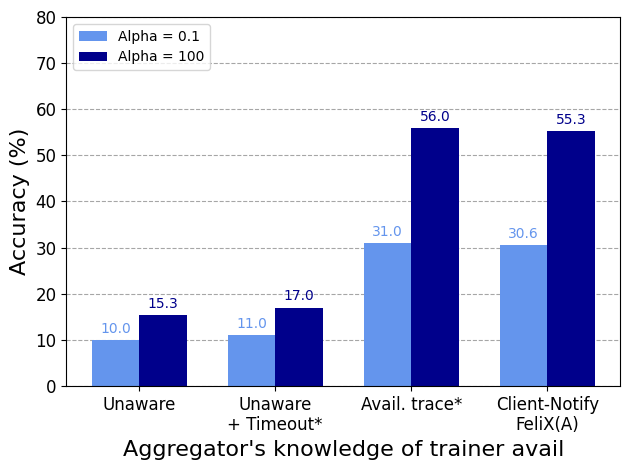

In [39]:
# Data for availability awareness (expt 1)
# data = [
#     ('Unaware', 15.3, 17),
#     ('Unaware\n+ timeout*', 17, 22),
#     ('Avail. trace*', 56, 920),
#     ('Client-Notify\n[FeLiX(A)]', 55.3, 912),
# ]
x_labels = ['Unaware', 'Unaware\n+ Timeout*', 'Avail. trace*', 'Client-Notify\nFeliX(A)']
accuracies_alpha_0_1 = [10, 11, 31, 30.6]
accuracies_alpha_100 = [15.3, 17.0, 56.0, 55.3]
x_axis_label = 'Aggregator\'s knowledge of trainer avail'
file_name = '23jun_avail_awareness_expt_alpha0.1_100_n100_c20_k10_fedbuff.pdf'

plot_accuracies(x_labels, accuracies_alpha_0_1, accuracies_alpha_100, x_axis_label, file_name)

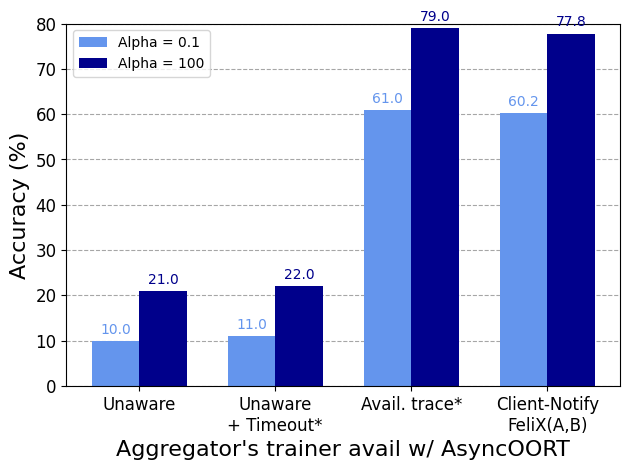

In [6]:
# Data for improved sampling (expt 2)
# data = [
#     ('Unaware*', 12, 17),
#     ('Unaware\n+ timeout*', 14, 22),
#     ('Avail. trace*', 62, 900),
#     ('Client-Notify\n[FeLiX(A+B)]', 60.23, 864),
# ]
x_labels = ['Unaware', 'Unaware\n+ Timeout*', 'Avail. trace*', 'Client-Notify\nFeliX(A,B)']
accuracies_alpha_0_1 = [10, 11, 61, 60.2]
accuracies_alpha_100 = [21, 22, 79, 77.8]
x_axis_label = 'Aggregator\'s trainer avail w/ AsyncOORT'
file_name = '23jun_improved_sampling_expt_alpha0.1_100_n100_c20_k10_fedbuff_asyncoort.pdf'

plot_accuracies(x_labels, accuracies_alpha_0_1, accuracies_alpha_100, x_axis_label, file_name)

### Delay distribution motivation plot

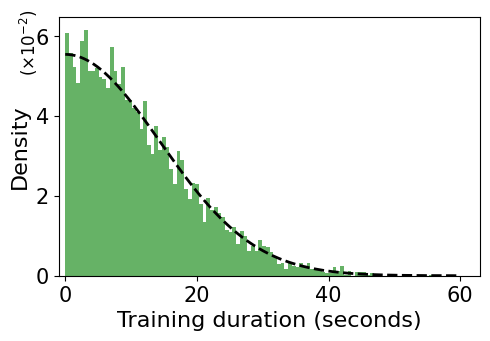

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import halfnorm

NUM_CLIENTS=3000

# Desired range
min_value = 0
max_value = 60

# Set the seed for reproducibility
np.random.seed(42)

# Calculate standard deviation for a normal distribution covering the range
std_dev = (max_value - min_value) / (2 * np.sqrt(2 * np.log(2)))

# Adjust the scale parameter for the half-normal distribution
scale = std_dev / np.sqrt(np.pi)

# Sample NUM_CLIENTS points from the adjusted half-normal distribution
samples = halfnorm.rvs(scale=scale, size=NUM_CLIENTS*2)

# Plot the histogram of the sampled data points
plt.figure(figsize=(5, 3.5))
plt.hist(samples, bins=100, density=True, alpha=0.6, color='g')

# Plot the theoretical PDF for comparison
x = np.linspace(min_value, max_value, 1000)
pdf = halfnorm.pdf(x, scale=scale)
plt.plot(x, pdf, 'k', linewidth=2, linestyle='--')
plt.xlim(-1)

# Get the current Axes object
ax = plt.gca()

# Set the y-axis ticks to 1, 2, 3, etc. and format the labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x * 100)))

# Add annotation at the top
plt.text(-0.07, 0.9, '(×10$^{-2}$)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, size=12, rotation=90)

# plt.title('Histogram of Half-Normal Distribution Samples (0 to 60)')
plt.xlabel('Training duration (seconds)', size=16)
plt.ylabel('Density', size=16)
# Adjust layout for better spacing
plt.tight_layout()
# Save the plot as a PDF
plt.savefig("fedbuff_training_delay.pdf", format='pdf')
plt.show()

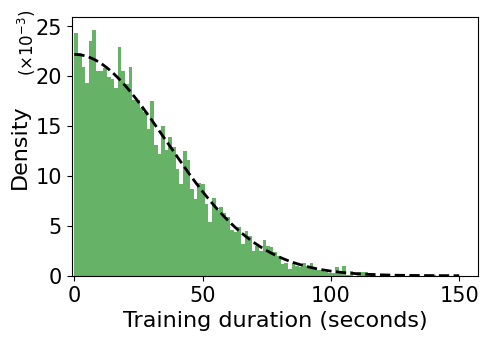

In [9]:
# Desired range
min_value = 0
max_value = 150

# Set the seed for reproducibility
np.random.seed(42)

# Calculate standard deviation for a normal distribution covering the range
std_dev = (max_value - min_value) / (2 * np.sqrt(2 * np.log(2)))

# Adjust the scale parameter for the half-normal distribution
scale = std_dev / np.sqrt(np.pi)

# Sample NUM_CLIENTS points from the adjusted half-normal distribution
samples = halfnorm.rvs(scale=scale, size=NUM_CLIENTS*2)

# Plot the histogram of the sampled data points
plt.figure(figsize=(5, 3.5))
plt.hist(samples, bins=100, density=True, alpha=0.6, color='g')

# Plot the theoretical PDF for comparison
x = np.linspace(min_value, max_value, 1000)
pdf = halfnorm.pdf(x, scale=scale)
plt.plot(x, pdf, 'k', linewidth=2, linestyle='--')
plt.xlim(-1)

# Get the current Axes object
ax = plt.gca()

# Set the y-axis ticks to 1, 2, 3, etc. and format the labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x * 1000)))

# Add annotation at the top
plt.text(-0.11, 0.9, '(×10$^{-3}$)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, size=12, rotation=90)

# plt.title('Histogram of Half-Normal Distribution Samples (0 to 60)')
plt.xlabel('Training duration (seconds)', size=16)
plt.ylabel('Density', size=16)
# Adjust layout for better spacing
plt.tight_layout()
# Save the plot as a PDF
plt.savefig("papaya_training_delay.pdf", format='pdf')
plt.show()

### Mobiperf trace analysis

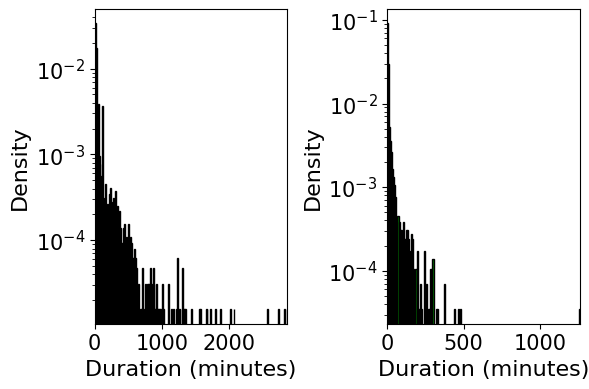

In [53]:
import json
import os
import matplotlib.pyplot as plt

# Initialize lists to store failure and availability durations in minutes
failure_durations = []
availability_durations = []

# Path to the directory containing the JSON files
directory_path = '/home/dgarg39/flame/lib/python/examples/async_google_speech/trainer/config_dir0.1_num300_traceFail_48h/'

# Iterate through each JSON file in the directory
for filename in os.listdir(directory_path):
    if filename.startswith('trainer_') and filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            failure_durations_s = data['hyperparameters']['failure_durations_s']
            
            # Parse the string of list of tuples into actual list of tuples
            failure_durations_list = eval(failure_durations_s)
            
            # Calculate durations in minutes and append to the respective lists
            for i, (start, duration) in enumerate(failure_durations_list):
                failure_durations.append(duration / 60)  # Convert to minutes
                
                if i > 0:
                    previous_start, previous_duration = failure_durations_list[i-1]
                    previous_end = previous_start + previous_duration
                    availability_duration = (start - previous_end) / 60  # Convert to minutes
                    availability_durations.append(availability_duration)

# Generate density histograms
# Histogram for failure durations
plt.subplot(1, 2, 1)
plt.hist(failure_durations, bins=200, color='red', edgecolor='black', density=True, log=True)
# plt.title('Log-Scaled Density Histogram of Failure Durations (Minutes)')
plt.xlabel('Duration (minutes)', size=16)
plt.ylabel('Density', size=16)
plt.xlim(0, max(failure_durations))  # Adjust the range as needed

# Histogram for availability durations
plt.subplot(1, 2, 2)
plt.hist(availability_durations, bins=200, color='green', edgecolor='black', density=True, log=True)
# plt.title('Log-Scaled Density Histogram of Availability Durations (Minutes)')
plt.xlabel('Duration (minutes)', size=16)
plt.ylabel('Density', size=16)
plt.xlim(0, max(availability_durations))  # Adjust the range as needed

# Show plots
plt.tight_layout()
plt.show()


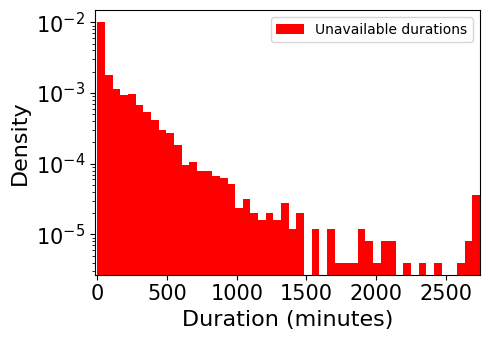

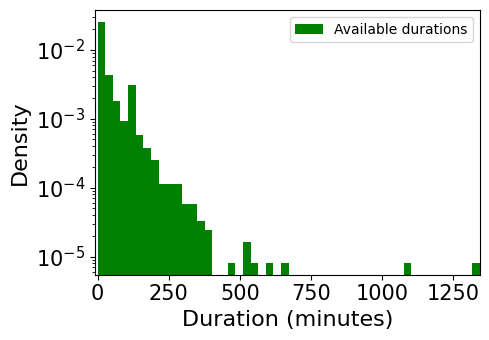

In [4]:
import json
import os
import matplotlib.pyplot as plt

# Initialize lists to store failure and availability durations in minutes
failure_durations = []
availability_durations = []

# Path to the directory containing the JSON files
directory_path = '/home/dgarg39/flame/lib/python/examples/async_google_speech/trainer/config_dir0.1_num300_traceFail_48h/'

# Iterate through each JSON file in the directory
for filename in os.listdir(directory_path):
    if filename.startswith('trainer_') and filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            failure_durations_s = data['hyperparameters']['failure_durations_s']
            previous_end = 0
            start = 0
            duration = 0
            
            # Parse the string of list of tuples into actual list of tuples
            failure_durations_list = eval(failure_durations_s)
            
            # Calculate durations in minutes and append to the respective lists
            for i, (start, duration) in enumerate(failure_durations_list):
                failure_durations.append(duration/60)  # Convert to minutes
                
                if i == 0:
                    availability_duration = (start-1)/60
                    if availability_duration < 0:
                        print("[i==0] negative value found for avail_duration: ", availability_duration)
                    availability_durations.append(availability_duration)
                
                elif i > 0 and i != len(failure_durations_list) - 1:
                    previous_start, previous_duration = failure_durations_list[i-1]
                    previous_end = previous_start + previous_duration
                    availability_duration = (start - previous_end) / 60  # Convert to minutes
                    if availability_duration < 0:
                        print("negative value found for avail_duration: ", availability_duration)
                        print("previous_start: ", previous_start)
                        print("previous_duration: ", previous_duration)
                        print("previous_end: ", previous_end)
                        print("start: ", start)
                        print("file_path: ", file_path)

                    availability_durations.append(availability_duration)

                elif i == len(failure_durations_list) - 1:
                    availability_duration = ((48*60*60)-(start+duration))/60
                    if availability_duration < 0:
                        print("[i==0] negative value found for avail_duration: ", availability_duration)
                    availability_durations.append(availability_duration)

# Plot for failure durations
plt.figure(figsize=(5, 3.5))
plt.hist(failure_durations, bins=50, color='red', density=True, log=True)
plt.xlim(-20)
plt.xlabel('Duration (minutes)', size=16)
plt.ylabel('Density', size=16)
plt.legend(['Unavailable durations'])
plt.xlim(right=max(failure_durations))  # Adjust the range as needed
plt.tight_layout()
plt.savefig("mobiperf_unavailability_durations.pdf", format='pdf')
plt.show()

# Plot for availability durations
plt.figure(figsize=(5, 3.5))
plt.hist(availability_durations, bins=50, color='green', density=True, log=True)
plt.xlim(-10)
plt.xlabel('Duration (minutes)', size=16)
plt.ylabel('Density', size=16)
plt.legend(['Available durations'])
plt.xlim(right=max(availability_durations))  # Adjust the range as needed
plt.tight_layout()
plt.savefig("mobiperf_availability_durations.pdf", format='pdf')
plt.show()

In [101]:
# Find and count the negative values
negative_values = [value for value in availability_durations if value < 0]
count_negative = len(negative_values)

# Print the count and the negative values
print("Number of values < 0:", count_negative)
print("Negative values:", negative_values)

Number of values < 0: 0
Negative values: []


In [91]:
availability_durations

[0.8833333333333333,
 7.083333333333333,
 4.0,
 8.3,
 1.2666666666666666,
 0.26666666666666666,
 3.15,
 0.7166666666666667,
 3.816666666666667,
 0.9166666666666666,
 1.6166666666666667,
 3.2333333333333334,
 2.7333333333333334,
 1.9666666666666666,
 6.95,
 2.216666666666667,
 136.5,
 0.16666666666666666,
 4.633333333333334,
 208.9,
 0.03333333333333333,
 162.76666666666668,
 0.16666666666666666,
 0.016666666666666666,
 2.5,
 -99.25,
 0.03333333333333333,
 4.5,
 56.916666666666664,
 55.55,
 38.733333333333334,
 108.01666666666667,
 13.1,
 22.466666666666665,
 6.366666666666666,
 0.16666666666666666,
 11.983333333333333,
 11.6,
 158.93333333333334,
 9.166666666666666,
 5.3,
 79.58333333333333,
 0.016666666666666666,
 20.5,
 86.13333333333334,
 0.8833333333333333,
 7.083333333333333,
 4.0,
 8.3,
 1.2666666666666666,
 0.26666666666666666,
 3.15,
 0.7166666666666667,
 3.816666666666667,
 0.9166666666666666,
 1.6166666666666667,
 3.2333333333333334,
 2.7333333333333334,
 1.9666666666666666,


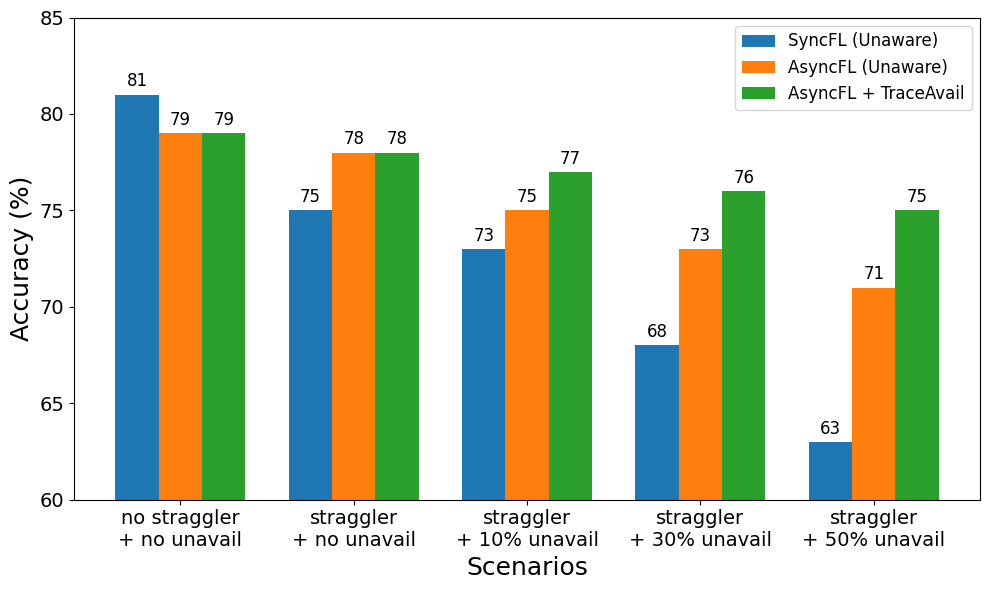

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Define baseline labels and x tick labels
baseline_labels = ['SyncFL (Unaware)', 'AsyncFL (Unaware)', 'AsyncFL+TraceAvail']
x_labels = [
    'no straggler\n+ no unavail',
    'straggler\n+ no unavail',
    'straggler\n+ 10% unavail',
    'straggler\n+ 30% unavail',
    'straggler\n+ 50% unavail'
]

# Generate random durations (in minutes) for each baseline
syncfl_acc = [81, 75, 73, 68, 63]
asyncfl_acc = [79, 78, 75, 73, 71]
asyncfl_traceavail_acc = [79, 78, 77, 76, 75]

# Plotting
bar_width = 0.25
index = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_ylim(60, 85)

bar1 = ax.bar(index - bar_width, syncfl_acc, bar_width, label='SyncFL (Unaware)')
bar2 = ax.bar(index, asyncfl_acc, bar_width, label='AsyncFL (Unaware)')
bar3 = ax.bar(index + bar_width, asyncfl_traceavail_acc, bar_width, label='AsyncFL + TraceAvail')

# Adding annotations above the bars
def add_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=12)

add_annotations(bar1)
add_annotations(bar2)
add_annotations(bar3)

# Adjust y-tick labels size
ax.tick_params(axis='y', labelsize=14)

ax.set_xlabel('Scenarios', size=18)
ax.set_ylabel('Accuracy (%)', size=18)
# ax.set_title('Comparison of Baselines in Different Scenarios')
ax.set_xticks(index)
ax.set_xticklabels(x_labels, rotation=0, ha='center', size=14)
ax.legend(fontsize='large')  # Increase legend text size

plt.tight_layout()
plt.savefig("motiv_accuracy_impact.pdf", format='pdf')

plt.show()

### Counting the number of layers and params: CIFAR-10 CNN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    """Net class."""

    def __init__(self):
        """Initialize."""
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.conv2 = nn.Conv2d(64, 128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        """Forward."""
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

def get_model_summary(model):
    total_params = sum(p.numel() for p in model.parameters())
    total_layers = len(list(model.named_parameters()))
    
    print(f"Total number of parameters: {total_params}")
    print(f"Total number of layers: {total_layers}")

# Instantiate the model and print the summary
model = Net()
get_model_summary(model)

Total number of parameters: 537610
Total number of layers: 12


### Layers and parameters in modified ResNet-34 model for Google Speech dataset

In [2]:
class BasicBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet34_1D(nn.Module):
    def __init__(self, n_input=1, n_output=35):
        super(ResNet34_1D, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv1d(n_input, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 3)
        self.layer2 = self._make_layer(128, 4, stride=2)
        self.layer3 = self._make_layer(256, 6, stride=2)
        self.layer4 = self._make_layer(512, 3, stride=2)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, n_output)

    def _make_layer(self, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv1d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(out_channels),
            )

        layers = []
        layers.append(BasicBlock1D(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock1D(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return F.log_softmax(x, dim=1)
    

model = ResNet34_1D()
get_model_summary(model)

Total number of parameters: 7236195
Total number of layers: 110


### Layers and parameters in original ResNet34 architecture

In [3]:
import torchvision.models as models

model = models.resnet34()
get_model_summary(model)

Total number of parameters: 21797672
Total number of layers: 110
